# Titanic Survival Prediction

## Framing the problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Obtain Data

#### Importing the basic required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import missingno as ms
%matplotlib inline

### Reading the data from CSV file

In [2]:
data = pd.read_csv('titanic.csv')

## Analyze Data

#### Obtaining a glimpse of data

In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

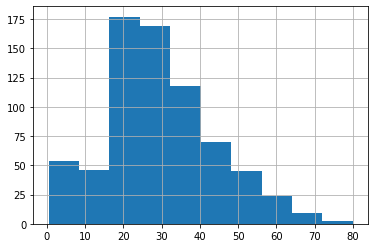

In [9]:
data['Age'].hist()

<AxesSubplot:>

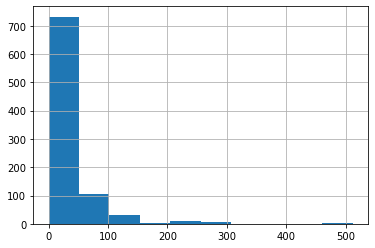

In [10]:
data['Fare'].hist()

## Cleaning of data

#### Fill the missing values in the obtained data

In [11]:
data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


The average age for each of the classes are estimated to be as follows:
  
  * For **Class 1** - The median age is 37
  * For **Class 2** - The median age is 29
  * For **Class 3** - The median age is 24
  
Let's impute these values into the age column.



In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        # Class-1
        if Pclass == 1:
            return 37
        # Class-2 
        elif Pclass == 2:
            return 29
        # Class-3
        else:
            return 24

    else:
        return Age



Applying the function.

In [13]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

The Age column is imputed sucessfully.

Let's drop the Cabin column.

In [14]:
data.drop('Cabin', axis = 1,inplace=True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Categorical value conversion

In [17]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
sex_df = pd.get_dummies(data['Sex'],drop_first=3)
sex_df.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
embark_df = pd.get_dummies(data['Embarked'],drop_first=True)
embark_df.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
data.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [24]:
data = pd.concat([data,sex_df,embark_df],axis=1)

In [25]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [27]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Model Selection

### Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [29]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,1,30.0,0,0,93.5000,0,0,1
510,3,29.0,0,0,7.7500,1,1,0
446,2,13.0,0,1,19.5000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
691,3,4.0,0,1,13.4167,0,0,0


In [30]:
X_train.shape

(623, 8)

### KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[3,5,7,11,19], 'weights':['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}

knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters)

knn_clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 19],
                         'weights': ['uniform', 'distance']})

In [32]:
knn_clf.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

### Support Vector Machine Classifier

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVC()
svc_clf = GridSearchCV(svc, parameters)

svc_clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [34]:
svc_clf.best_estimator_

SVC(C=10, kernel='linear')

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']}

rfc = RandomForestClassifier(random_state=42)
rfc_clf = GridSearchCV(rfc, parameters)
rfc_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]})

In [36]:
rfc_clf.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

### Predicting the model on the test set

In [37]:
svc_predicted = svc_clf.predict(X_test)
rfc_predicted = rfc_clf.predict(X_test)
knn_predicted = knn_clf.predict(X_test)

## Evaluate the predictions

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(confusion_matrix(y_test, svc_predicted))

[[132  22]
 [ 41  73]]


In [40]:
print(confusion_matrix(y_test, rfc_predicted))

[[146   8]
 [ 43  71]]


In [41]:
print(confusion_matrix(y_test, knn_predicted))

[[129  25]
 [ 43  71]]


#### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.



In [42]:
from sklearn.metrics import precision_score

In [43]:
print(precision_score(y_test,svc_predicted))

0.7684210526315789


In [44]:
print(precision_score(y_test, rfc_predicted))

0.8987341772151899


In [45]:
print(precision_score(y_test, knn_predicted))

0.7395833333333334


#### Recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.



In [46]:
from sklearn.metrics import recall_score

In [47]:
print(recall_score(y_test,svc_predicted))

0.6403508771929824


In [48]:
print(recall_score(y_test, rfc_predicted))

0.6228070175438597


In [49]:
print(recall_score(y_test, knn_predicted))

0.6228070175438597


#### f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
                F1 = 2 \* (precision \* recall) / (precision + recall)

In [50]:
from sklearn.metrics import f1_score

In [51]:
print(f1_score(y_test,svc_predicted))

0.6985645933014354


In [52]:
print(f1_score(y_test,rfc_predicted))

0.7357512953367876


In [53]:
print(f1_score(y_test,knn_predicted))

0.6761904761904762


### Classification Report

To get all the above metrics at one go, use the following function:

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,svc_predicted ))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       154
           1       0.77      0.64      0.70       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [56]:
print(classification_report(y_test,rfc_predicted ))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       154
           1       0.90      0.62      0.74       114

    accuracy                           0.81       268
   macro avg       0.84      0.79      0.79       268
weighted avg       0.83      0.81      0.80       268



In [57]:
print(classification_report(y_test,knn_predicted ))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       154
           1       0.74      0.62      0.68       114

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.75      0.74       268



---
                                    THE END